# Исследование объявлений о продаже квартир

#Описание проекта
В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
• balcony — число балконов
• ceiling_height — высота потолков (м)
• cityCenters_nearest — расстояние до центра города (м)
• days_exposition — сколько дней было размещено объявление (от публикации до снятия)
• first_day_exposition — дата публикации
• floor — этаж
• floors_total — всего этажей в доме
• is_apartment — апартаменты (булев тип)
• kitchen_area — площадь кухни в квадратных метрах (м²)
• last_price — цена на момент снятия с публикации
• living_area — жилая площадь в квадратных метрах (м²)
• locality_name — название населённого пункта
• open_plan — свободная планировка (булев тип)
• parks_around3000 — число парков в радиусе 3 км
• parks_nearest — расстояние до ближайшего парка (м)
• ponds_around3000 — число водоёмов в радиусе 3 км
• ponds_nearest — расстояние до ближайшего водоёма (м)
• rooms — число комнат
• studio — квартира-студия (булев тип)
• total_area — площадь квартиры в квадратных метрах (м²)
• total_images — число фотографий квартиры в объявлении

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Natalia\Downloads\real_estate_data.csv', sep = '\t', decimal=',')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.3,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

### Вывод
Всего 23699 наблюдений. Целочисленных наблюдений - 3, булевый тип - 2, вещественный тип - 17. 
Всего столбцов с пропусками-14. Заполним пропуски  там, где это возможно и заменим типы данных на более корректные.   

# Шаг 2. Предобработка данных

In [3]:
#замена типов данных там, где это возможно 
data['airports_nearest'] = data['airports_nearest'].astype('float')
data['balcony'] = data['balcony'].astype('float')
data['ceiling_height'] = data['ceiling_height'].astype('float')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['days_exposition'] = data['days_exposition'].astype('float')
data['floors_total'] = data['floors_total'].astype('float')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['kitchen_area'] = data['kitchen_area'].astype('float')
data['last_price'] = data['last_price'].astype('float').astype('int64')
data['living_area'] = data['living_area'].astype('float')
data['parks_around3000'] = data['parks_around3000'].astype('float')
data['parks_nearest'] = data['parks_nearest'].astype('float')
data['ponds_around3000'] = data['ponds_around3000'].astype('float')
data['ponds_nearest'] = data['ponds_nearest'].astype('float')
data['total_area'] = data['total_area'].astype('float').astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [4]:
#подсчет пропущенных значений в каждом столбце
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
# проверим какой % от всех данных составляют пропущенные значения
print('пропущенно в ceiling_height:', round(data['ceiling_height'].isnull().sum ()/ len(data['ceiling_height'])* 100, 0), '%')
print('пропущенно в floors_total:',round(data['floors_total'].isnull().sum ()/ len(data['floors_total'])* 100, 0), '%')
print('пропущенно в living_area:',round(data['living_area'].isnull().sum ()/ len(data['living_area'])* 100, 0), '%')
print('пропущенно в kitchen_area:',round(data['kitchen_area'].isnull().sum ()/ len(data['kitchen_area'])* 100, 0), '%')
print('пропущенно в balcony:',round(data['balcony'].isnull().sum ()/ len(data['balcony'])* 100, 0), '%')
print('пропущенно в locality_name:',round(data['locality_name'].isnull().sum ()/ len(data['locality_name'])* 100, 0), '%')
print('пропущенно в airports_nearest:',round(data['airports_nearest'].isnull().sum ()/ len(data['airports_nearest'])* 100, 0), '%')
print('пропущенно в cityCenters_nearest:',round(data['cityCenters_nearest'].isnull().sum ()/ len(data['cityCenters_nearest'])* 100, 0), '%')
print('пропущенно в parks_around3000:',round(data['parks_around3000'].isnull().sum ()/ len(data['parks_around3000'])* 100, 0), '%')
print('пропущенно в parks_nearest:',round(data['parks_nearest'].isnull().sum ()/ len(data['parks_nearest'])* 100, 0), '%')
print('пропущенно в ponds_around3000:',round(data['ponds_around3000'].isnull().sum ()/ len(data['ponds_around3000'])* 100, 0), '%')
print('пропущенно в ponds_nearest:',round(data['ponds_nearest'].isnull().sum ()/ len(data['ponds_nearest'])* 100, 0), '%')
print('пропущенно в days_exposition:',round(data['days_exposition'].isnull().sum ()/ len(data['days_exposition'])* 100, 0), '%')
print('пропущенно в is_apartment:',round(data['is_apartment'].isnull().sum ()/ len(data['is_apartment'])* 100, 0), '%')

пропущенно в ceiling_height: 39.0 %
пропущенно в floors_total: 0.0 %
пропущенно в living_area: 8.0 %
пропущенно в kitchen_area: 10.0 %
пропущенно в balcony: 49.0 %
пропущенно в locality_name: 0.0 %
пропущенно в airports_nearest: 23.0 %
пропущенно в cityCenters_nearest: 23.0 %
пропущенно в parks_around3000: 23.0 %
пропущенно в parks_nearest: 66.0 %
пропущенно в ponds_around3000: 23.0 %
пропущенно в ponds_nearest: 62.0 %
пропущенно в days_exposition: 13.0 %
пропущенно в is_apartment: 0.0 %


### Вывод
Пропуск, которые не будем заменять:
Пропущенные значения в столбцах "floors_total" и "locality_name" можно оставить, так как очень маленький %. 

В пропущенных значениях "ceiling_height" продавец не захотел указывать высоту потолков, возможно из-за риска отказа клиентов для которых важна высота помещения.

В "airports_nearest" пропуски скорее всего обусловленны тем, что аэропорт находится слишком далеко. 

В "cityCenters_nearest" пропуски скорее всего обусловленны тем, что возможно квартиры расположенны в соседних населенных пунктах.

В "parks_nearest" пропуски скорее всего обусловленны тем, что парки находятся слишком далеко или их нет.

В "ponds_nearest" пропуски скорее всего обусловленны тем, что водоемы находятся слишком далеко или их нет.

В "days_exposition" пока оставим пропуски.

В "living_area" пока оставим пропуски как есть.

In [6]:
#замена пропусков в "ceiling_height" 
data.query('ceiling_height > 2 and ceiling_height < 8.3')['ceiling_height'].mean()
data['ceiling_height'] = data['ceiling_height'].fillna(2.69)

In [7]:
#замена пропусков в "kitchen_area" 
# заменим на 0 значения, потому что скорее всего это квартиры студии или кухня объединенна с гостинной 
data['kitchen_area']=data['kitchen_area'].fillna(0)
print('Проверим сколько пропусков осталось после обработки:', len(data[data['kitchen_area'].isnull()]))

Проверим сколько пропусков осталось после обработки: 0


In [8]:
#замена пропусков в 'balcony' NaN в данном случае можно заменить на 0 
data['balcony']=data['balcony'].fillna(0)
print('Проверим сколько пропусков осталось после обработки:', len(data[data['balcony'].isnull()]))

Проверим сколько пропусков осталось после обработки: 0


In [9]:
#замена пропусков в 'parks_around3000' NaN в данном случае можно заменить на 0 
data['parks_around3000']=data['parks_around3000'].fillna(0)
print('Проверим сколько пропусков осталось после обработки:', len(data[data['parks_around3000'].isnull()]))

Проверим сколько пропусков осталось после обработки: 0


In [10]:
#замена пропусков в 'ponds_around3000' NaN в данном случае можно заменить на 0 
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
print('Проверим сколько пропусков осталось после обработки:', len(data[data['ponds_around3000'].isnull()]))

Проверим сколько пропусков осталось после обработки: 0


In [13]:
#замена пропусков в "is_apartment".  Пропущенные значения скорей всего означают,что аппартаменты не входят в предложение по продаже кваритр, поэтому выполним замену неизвестных данных на значение False
print(data['is_apartment'].unique())
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())

[ True False]
[ True False]


### Приведение к общему регистру 

In [14]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.00,8,True,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,2.69,11.0,18.60,1,True,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,2.69,5.0,34.30,4,True,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,2.69,14.0,NaN,9,True,...,0.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.00,13,True,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30,2018-09-10,1,2.69,12.0,14.40,5,True,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000,37,2017-11-02,1,2.69,26.0,10.60,6,True,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71,2019-04-18,2,2.69,24.0,NaN,22,True,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33,2018-05-23,1,2.69,27.0,15.43,26,True,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.60,7,True,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [15]:
# обработка столбца "locality_name"
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок') # исправление ошибки
print(data['locality_name'].value_counts())

санкт-петербург                     15721
посёлок мурино                        556
посёлок шушары                        440
всеволожск                            398
пушкин                                369
                                    ...  
посёлок левашово                        1
садовое товарищество новая ропша        1
деревня шпаньково                       1
деревня курковицы                       1
посёлок дзержинского                    1
Name: locality_name, Length: 330, dtype: int64


In [17]:
# переименуем столбцы cityCenters_nearest, parks_around3000, ponds_around3000
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3km', 'ponds_around3000':'ponds_around_3km'}, inplace = True )
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

# Шаг 3. Посчитайте и добавьте в таблицу

In [19]:
#цена квадратного метра
data ['price_per_meter2'] =round((data['last_price']/ data['total_area'])/1000)# перевод из рублей в тыс. рублей и округление

#день недели, месяц и год публикации объявления
data['day_of_week'] = data['first_day_exposition']. dt.weekday
data['day_month'] = data['first_day_exposition']. dt.month
data['day_year'] = data['first_day_exposition']. dt.year

#этаж квартиры; варианты — первый, последний, другой
def categori(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor < floors_total:
        return 'другой'
    if floor == floors_total:
        return 'последний'

data['floor_category'] = data.apply(categori, axis=1)

#соотношение жилой и общей площади
data['relation_area'] = round(data['living_area']/data['total_area'], 2)

#отношение площади кухни к общей
data['relation_area_kitchen'] = round(data['kitchen_area']/data['total_area'], 2)
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70          16.0         51.0      8          True  ...   
1            2.69          11.0         18.6      1          True  ...   
2            2.69           5.0         34.3      4          True  ...   
3            2.69          14.0          NaN      9          True  ...   
4            3.03          14.0         32.0     13          True  ...   

   ponds_around_3km  ponds_nearest  days_exposition  price_per_meter2  \
0               2.0          755.0              NaN    

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

### Площадь

Диаграмма размаха площади квартиры


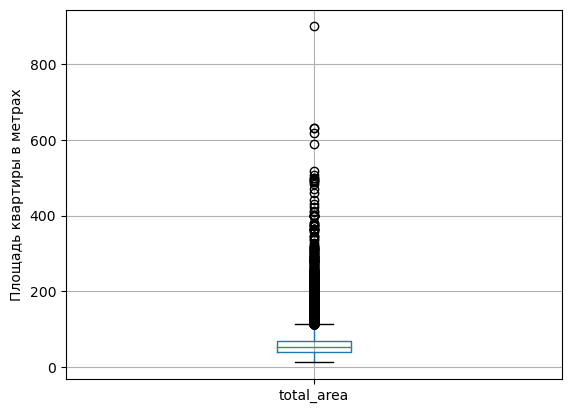

In [20]:
print("Диаграмма размаха площади квартиры")
data.boxplot(column=['total_area'], grid=True)
plt.ylabel('Площадь квартиры в метрах')
plt.show()

In [21]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [24]:
print("Гистограмма распределения площади квартиры")
data['total_area'].hist(bins=10, range=(0,400))

Гистограмма распределения площади квартиры


<AxesSubplot:>

Отсечём чрезмерно выбивающиеся значения, площадь выше 100 кв.метров нам для дальнейшей статистики не интересна.

Улучшенная диаграмма размаха площади квартиры


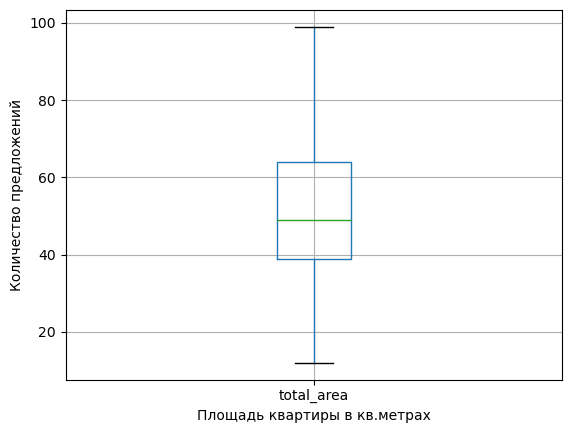

In [23]:
good_data = data.query('total_area < 100')
print("Улучшенная диаграмма размаха площади квартиры")
good_data.boxplot(column=['total_area'], grid=True)
plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

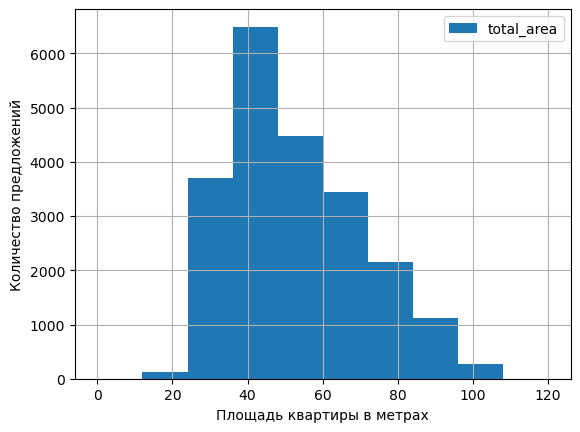

In [24]:
good_data.plot(kind='hist', y='total_area',grid=True, range=(0,120))
plt.xlabel('Площадь квартиры в метрах')
plt.ylabel('Количество предложений')
plt.show()

### Больше всего предложений по квартирам с площадью от 30-60 кв. метров

### Цена

Диаграмма размаха стоимости квартиры


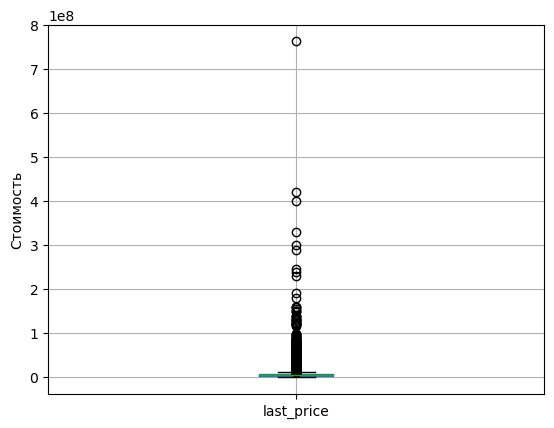

In [25]:
print("Диаграмма размаха стоимости квартиры")
data.boxplot(column=['last_price'], grid=True)
plt.ylabel('Стоимость')
plt.show()


Отбросим выбивающиеся значения по цене, т.к. они будут мешать при построении графика.Cтоимость квартир свыше 10 млн. встречается редко в наших данных, отсечём лишнее.

Улучшенная диаграмма размаха стоимости квартиры


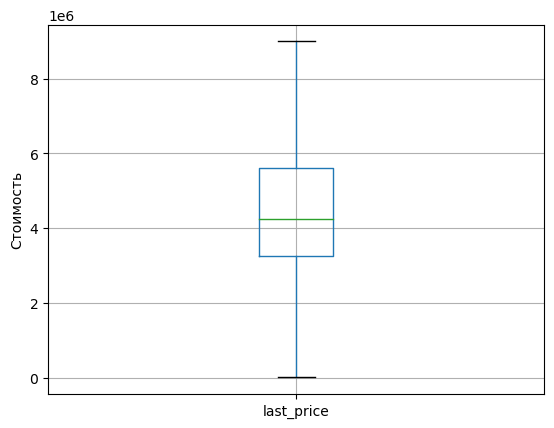

In [26]:
good_data = data.query('last_price < 9000000')
print("Улучшенная диаграмма размаха стоимости квартиры")
good_data.boxplot(column=['last_price'], grid=True)
plt.ylabel('Стоимость')
plt.show()

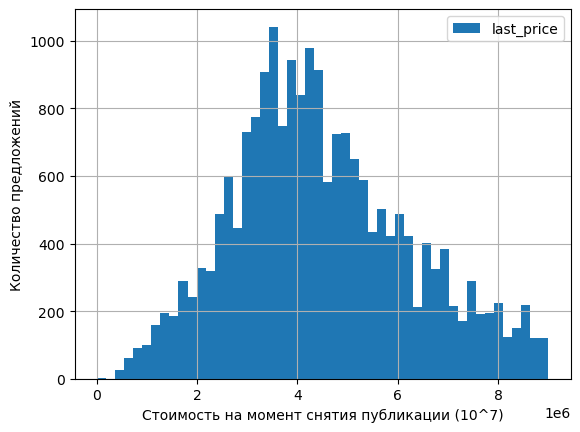

In [27]:
good_data.plot(kind='hist', y='last_price',grid=True, bins=50)
plt.xlabel('Cтоимость на момент снятия публикации (10^7)')
plt.ylabel('Количество предложений')
plt.show()

### Видно что больше всего предложений на квартиры стоимостью около 4 млн. рублей

### Число комнат 

Диаграмма размаха числа комнат


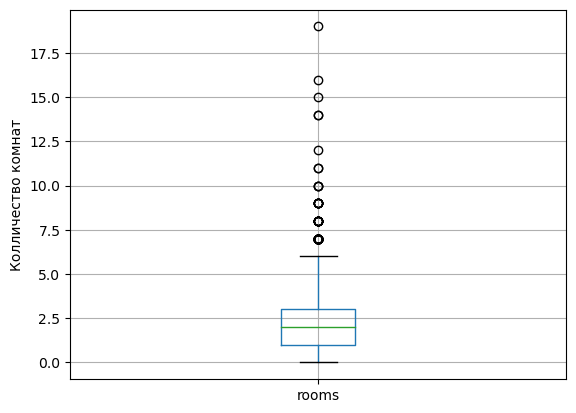

In [28]:
print("Диаграмма размаха числа комнат")
data.boxplot(column=['rooms'], grid=True)
plt.ylabel('Колличество комнат')
plt.show()

Отбросим выбивающиеся значения, оставим число комнат не больше 7

Улучшенная диаграмма размаха числа комнат


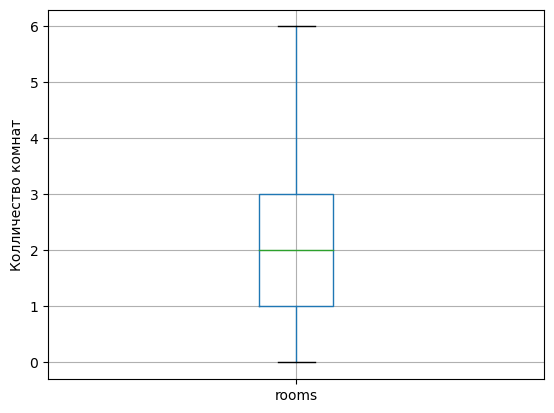

In [29]:
good_data = data.query('rooms < 7')
print("Улучшенная диаграмма размаха числа комнат")
good_data.boxplot(column=['rooms'], grid=True)
plt.ylabel('Колличество комнат')
plt.show()

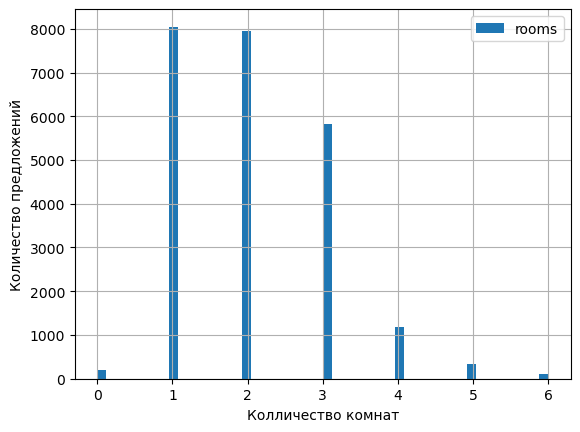

In [30]:
good_data.plot(kind='hist', y='rooms',grid=True, bins=50)
plt.xlabel('Колличество комнат')
plt.ylabel('Количество предложений')
plt.show()

### Чаще всего встечаются предложения с 1,2 комнатными квартирами

### Высота потолков

Диаграмма размаха высоты потолков


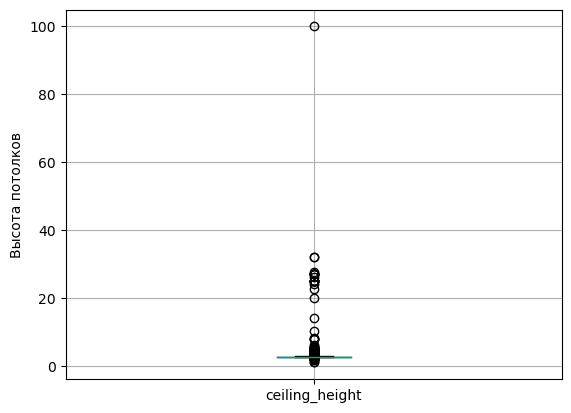

In [31]:
print("Диаграмма размаха высоты потолков")
data.boxplot(column=['ceiling_height'], grid=True)
plt.ylabel('Высота потолков')
plt.show()

In [32]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.739878
std          0.987322
min          1.000000
25%          2.600000
50%          2.690000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Улучшенная диаграмма высоты потолков


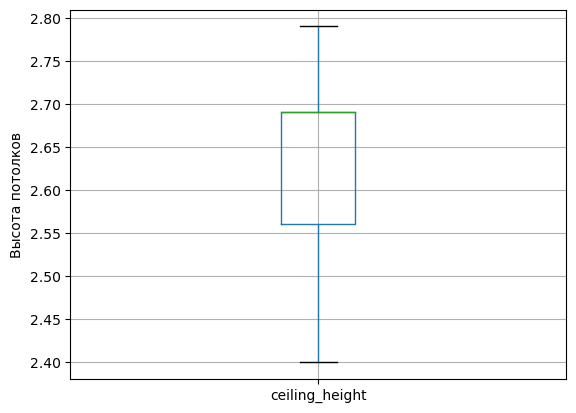

In [33]:
good_data = data.query(' 2.4 <= ceiling_height < 2.8')
print("Улучшенная диаграмма высоты потолков")
good_data.boxplot(column=['ceiling_height'], grid=True)
plt.ylabel('Высота потолков')
plt.show()

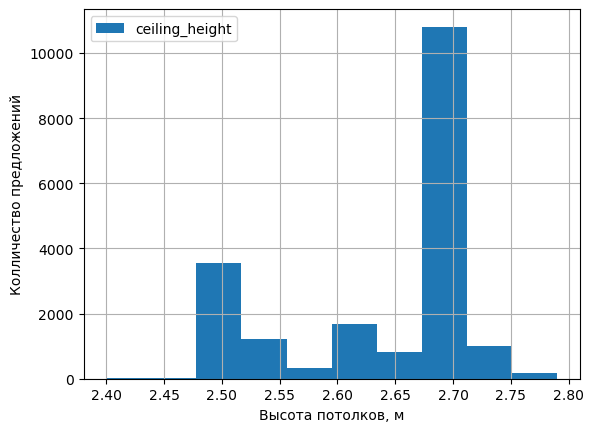

In [34]:
good_data.plot(kind='hist', y='ceiling_height',grid=True, bins=10)
plt.xlabel('Высота потолков, м')
plt.ylabel('Колличество предложений')
plt.show()

### Больше всего предложений наблюдается по квартирам с высотой потолков 2,6 м.

### Вывод: 
### По результатам исследования площади,  цены, числа комнат и  высоты потолков можно сказать, что больше всего предложений имеется по квартирам с площадью 30-60 м^2, стоимостью около 4 млн. рублей, имеющие 1 или 2 комнаты, с высотой потолков 2,6 м.

### Время продажи квартиры.

Диаграмма времени продажи


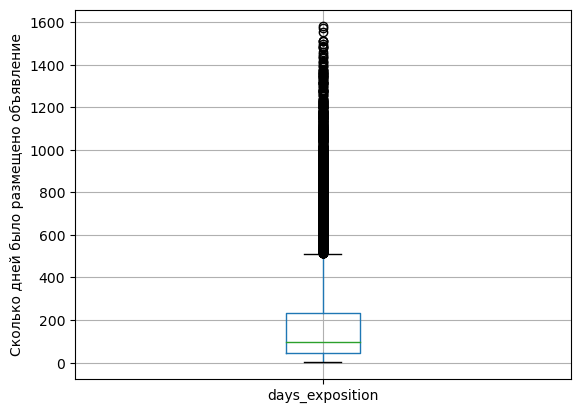

In [35]:
print("Диаграмма времени продажи")
data.boxplot(column=['days_exposition'], grid=True)
plt.ylabel('Сколько дней было размещено объявление')
plt.show()

Улучшенная диаграмма высоты потолков


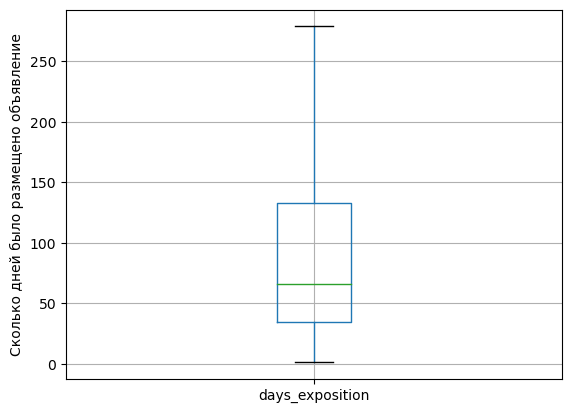

In [36]:
good_data = data.query('days_exposition < 280')
print("Улучшенная диаграмма высоты потолков")
good_data.boxplot(column=['days_exposition'], grid=True)
plt.ylabel('Сколько дней было размещено объявление')
plt.show()

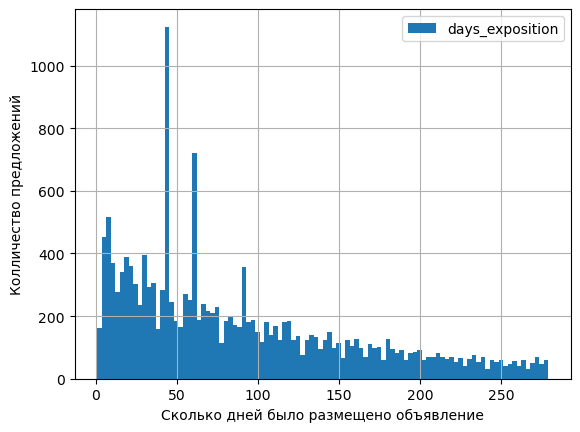

In [37]:
good_data.plot(kind='hist', y='days_exposition',grid=True, bins=100)
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Колличество предложений')
plt.show()

In [38]:
good_data['days_exposition'].describe()

count    16279.000000
mean        89.181522
std         70.361764
min          1.000000
25%         34.000000
50%         66.000000
75%        133.000000
max        279.000000
Name: days_exposition, dtype: float64

Среднее значение - 89 дней
Медиана - 66 дней

### Вывод: можно заметить, что в основном продажи осуществляются в 45 или 60 дней, тоесть на покупку квартиры после подачи объявления необходимо около 2х месяцев. Таким образом, можно считать, что продажи прошли быстро, если они длились 2-3 месяца, в остальных случаях продажи длились долго.

### Какие факторы больше всего влияют на стоимость квартиры?

In [39]:
print('Матрица корреляции зависимости цены от площади, числа комнат, удалённости от центра')
good_data[['last_price','living_area', 'rooms', 'city_centers_nearest']].corr()

Матрица корреляции зависимости цены от площади, числа комнат, удалённости от центра


,last_price,living_area,rooms,city_centers_nearest
last_price,1.000000,0.534413,0.334959,-0.172306
living_area,0.534413,1.000000,0.843791,-0.198933
rooms,0.334959,0.843791,1.000000,-0.156215
city_centers_nearest,-0.172306,-0.198933,-0.156215,1.000000


### Вывод: между стоимостью квартиры и ее площадью наблюдается прямая зависимость, тоесть чем дороже квартира, тем она больше по площади. Такая же зависимоть наблюдается между стоимомтью и колличеством комнат, но она менее выражена. Между стоимостью квартиры и удаленности от центра обратно пропорциональная зависимость(чем дороже квартира, тем расстояние до центра меньше), но такая зависимость выраженна очень слабо.

### Зависимость цены от того, на каком этаже расположена квартира

In [112]:
good_data = data.query('last_price < 9000000')

Гистаграмма зависимости цены от того, на каком этаже расположена квартира


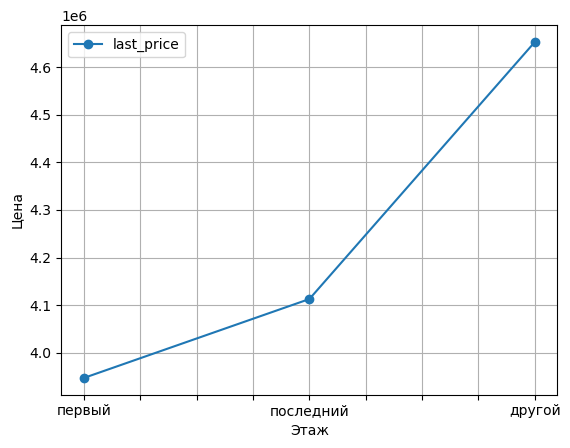

In [113]:
print('Гистаграмма зависимости цены от того, на каком этаже расположена квартира')
good_data.pivot_table(index='floor_category', values='last_price').sort_values(by='last_price', ascending=True).plot(style='o-',grid=True)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

График количественного отношения распределения предложений в зависимости от этажа


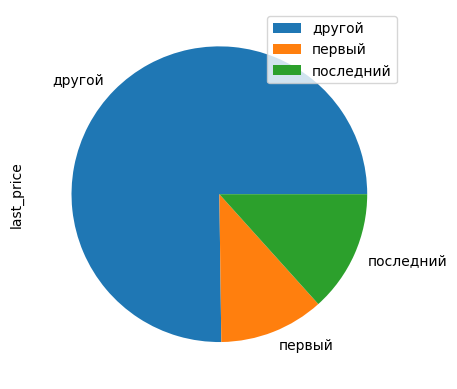

In [40]:
print('График количественного отношения распределения предложений в зависимости от этажа')
good_data.pivot_table(index='floor_category',values='last_price',aggfunc='count').plot.pie(y='last_price')
plt.show()

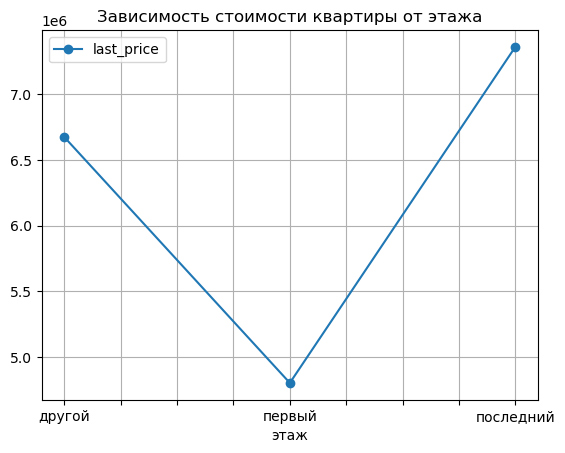

In [41]:
corr_floor=data.pivot_table(index='floor_category', values='last_price')
corr_floor.plot(style='o-', grid=True)
plt.title('Зависимость стоимости квартиры от этажа')
plt.xlabel('этаж')
plt.show()

### Вывод: Меньше всего стоимость квартиры на первом и последнем этаже дома. Больше всего предложений можно найти по квартирам, которые расположенны на других этажах (кроме первого и последнего)

### Зависимость от даты размещения: дня недели, месяца и года.

Гистаграмма зависимости цены от дня недели


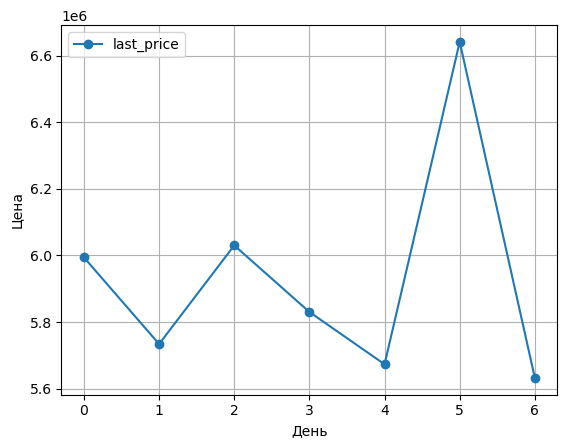

In [42]:
print('Гистаграмма зависимости цены от дня недели')
good_data.pivot_table(index='day_of_week', values='last_price').plot(style='o-',grid=True)
plt.xlabel('День')
plt.ylabel('Цена')
plt.show()

### Вывод: Стоимоть квартиры достигает своего пика в среду и начинает постепенно снижатся к концу недели.

Диаграмма размаха высоты потолков


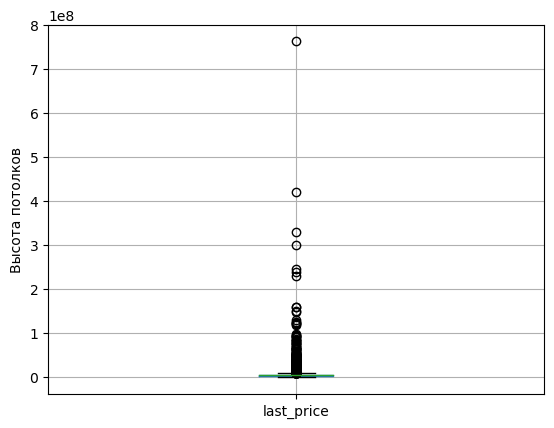

In [43]:
print("Диаграмма размаха высоты потолков")
good_data.boxplot(column=['last_price'], grid=True)
plt.ylabel('Высота потолков')
plt.show()

Гистаграмма зависимости цены от месяца


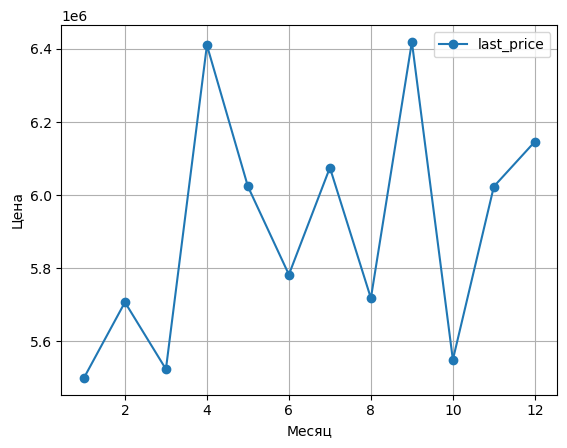

In [44]:
print('Гистаграмма зависимости цены от месяца')
good_data.pivot_table(index='day_month', values='last_price').plot(style='o-',grid=True)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

### Вывод: Самая высокая стоимость наблюдается в апреле, а самая низкая в июне.

Гистаграмма зависимости цены от года


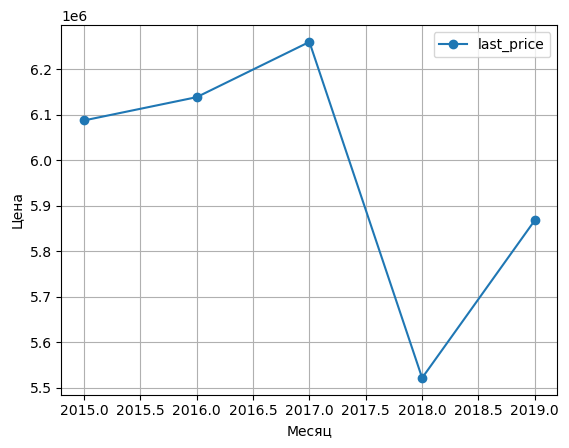

In [45]:
print('Гистаграмма зависимости цены от года')
good_data.pivot_table(index='day_year', values='last_price').plot(style='o-',grid=True)
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

### Вывод: Самая высокая стоимость наблюдается в 2014 году, затем она начинает падать с 2015 - 2018 год. В 2019 цены начинают рости.

### Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [46]:
data_top=data.groupby('locality_name').agg({'price_per_meter2':['count','mean']})
data_top.columns=['count_ad','price_per_meter2']
data_top=data_top.sort_values(by='count_ad', ascending=False).head(10)
data_top=data_top.sort_values(by='price_per_meter2', ascending=False)
data_top

,count_ad,price_per_meter2
locality_name,,
санкт-петербург,15721,115.349914
пушкин,369,103.612466
деревня кудрово,299,93.030100
посёлок парголово,327,90.629969
посёлок мурино,556,86.303957
посёлок шушары,440,79.075000
колпино,338,75.733728
гатчина,307,69.048860
всеволожск,398,68.992462


### Вывод: Самая высокая стоимость жилья наблюдается в Санкт-Петербурге, а самая низкая в Выборге

### Выделим квартиры в Санкт-Петербурге

In [47]:
data_center = data[['locality_name','price_per_meter2', 'city_centers_nearest', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floor', 'day_of_week', 'day_month', 'day_year']].copy()
data_center_petersburg= data_center.query('locality_name=="санкт-петербург"')
data_center_petersburg

,locality_name,price_per_meter2,city_centers_nearest,last_price,total_area,rooms,ceiling_height,floor,day_of_week,day_month,day_year
0,санкт-петербург,120.0,16028.0,13000000,108,3,2.70,8,3,3,2019
2,санкт-петербург,93.0,13933.0,5196000,56,2,2.69,4,3,8,2015
3,санкт-петербург,408.0,6800.0,64900000,159,3,2.69,9,4,7,2015
4,санкт-петербург,100.0,8098.0,10000000,100,2,3.03,13,1,6,2018
7,санкт-петербург,111.0,11634.0,7915000,71,2,2.69,22,3,4,2019
...,...,...,...,...,...,...,...,...,...,...,...
23689,санкт-петербург,101.0,16081.0,3550000,35,1,2.86,4,2,2,2018
23690,санкт-петербург,106.0,6263.0,5500000,52,2,2.69,2,3,7,2018
23691,санкт-петербург,132.0,4489.0,9470000,72,2,2.75,7,3,10,2016
23694,санкт-петербург,73.0,4232.0,9700000,133,3,3.70,3,1,3,2017


In [48]:
#посчитаем расстояние до центра города в км
data_center_petersburg['city_centers_nearest']=(data_center_petersburg['city_centers_nearest']/1000).round()
data_center_petersburg['city_centers_nearest'].describe()

C:\Users\Natalia\AppData\Local\Temp\ipykernel_9404\2310985178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_center_petersburg['city_centers_nearest']=(data_center_petersburg['city_centers_nearest']/1000).round()


count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest, dtype: float64

Диаграмма размаха расстояния до центра


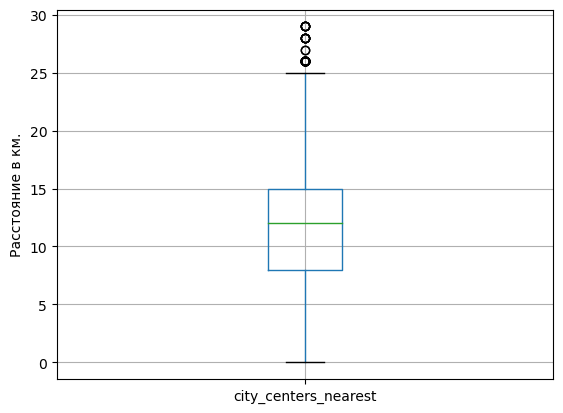

In [49]:
print("Диаграмма размаха расстояния до центра")
data_center_petersburg.boxplot(column=['city_centers_nearest'], grid=True)
plt.ylabel('Расстояние в км.')
plt.show()

Диаграмма размаха расстояния до центра


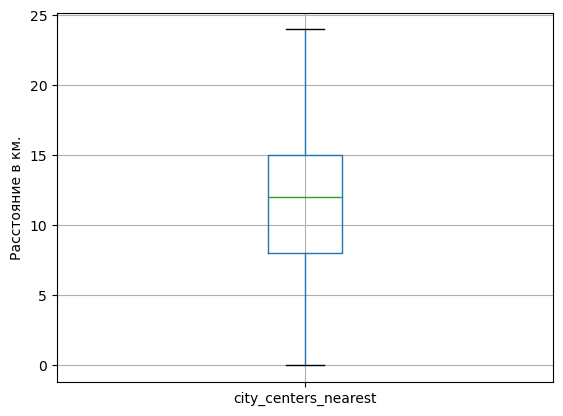

In [50]:
data_center_petersburg = data_center_petersburg.query('city_centers_nearest < 25')
print("Диаграмма размаха расстояния до центра")
data_center_petersburg.boxplot(column=['city_centers_nearest'], grid=True)
plt.ylabel('Расстояние в км.')
plt.show()

In [51]:
data_center_petersburg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15566 entries, 0 to 23697
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality_name         15566 non-null  object 
 1   price_per_meter2      15566 non-null  float64
 2   city_centers_nearest  15566 non-null  float64
 3   last_price            15566 non-null  int64  
 4   total_area            15566 non-null  int64  
 5   rooms                 15566 non-null  int64  
 6   ceiling_height        15566 non-null  float64
 7   floor                 15566 non-null  int64  
 8   day_of_week           15566 non-null  int64  
 9   day_month             15566 non-null  int64  
 10  day_year              15566 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.4+ MB


In [52]:
#посчитаем среднюю цену для каждого км.
mean_cost = (data_center_petersburg['last_price'].sum()/data_center_petersburg['city_centers_nearest'].sum()).round()
print('Средняя стоимость км:', mean_cost, 'р.')

Средняя стоимость км: 700005.0 р.


Гистаграмма зависимости цены от расстояния до центра


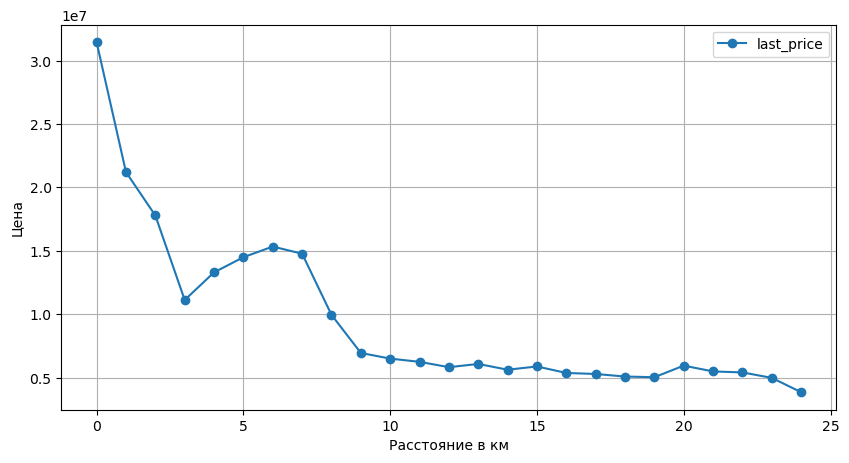

In [53]:
print('Гистаграмма зависимости цены от расстояния до центра')
data_center_petersburg.pivot_table(index='city_centers_nearest', values='last_price').plot(figsize=(10,5), style='o-',grid=True)
plt.xlabel('Расстояние в км')
plt.ylabel('Цена')
plt.show()

### Вывод: Резкий спад цен на недвижимость наблюдается после удаленности от центра более чем 7,8 км. Тоесть сигментом квартир в центре будем считать квартиры, которые находятся на расстоянии 1- 7 км от центра. Также на графике наблюдается аномальный спад в стоимости для квартир на расстояние 3,5-4 км. Это может быть связанно с тем, что данные квартиры находятся в старом жилом фонде, из-за близости к центру.

### Анализ квартир в центре Санкт-Петербурга

In [178]:
#Средние показатели для квартир в центре
print('Средняя площадь в м2:', data_center_petersburg['total_area'].mean())
print('Средняя стоимость в руб:', data_center_petersburg['last_price'].mean())
print('Среднее число комнат:', data_center_petersburg['rooms'].mean())
print('Средняя высота потолков в м:', data_center_petersburg['ceiling_height'].mean())

Средняя площадь в м2: 64.52878067583194
Средняя стоимость в руб: 8056034.598548118
Среднее число комнат: 2.1744186046511627
Средняя высота потолков в м: 2.7630328922009717


### Вывод: По результатам исследования квартир в центре можно сказать, что больше всего предложений имеется по квартирам с площадью 64 м^2, стоимостью около 8 млн. рублей, имеющие 2 комнаты, с высотой потолков 2,7 м.

### Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [54]:
print('Матрица корреляции зависимости цены от площади, числа комнат, удалённости от центра')
data_center_petersburg[['last_price', 'total_area','rooms', 'floor','city_centers_nearest', 'day_of_week', 'day_month', 'day_year']].corr().head(1)


Матрица корреляции зависимости цены от площади, числа комнат, удалённости от центра


,last_price,total_area,rooms,floor,city_centers_nearest,day_of_week,day_month,day_year
last_price,1.0,0.655068,0.371012,-0.000758,-0.2613,0.006214,0.000261,-0.045079


### Вывод: Можно заметить, что на стоимость квартир в центре влияют только площадь и кол-во комнат.  

### Сравнение квартир в центре с квартирами всей выборки

Гистаграмма зависимости цены от года


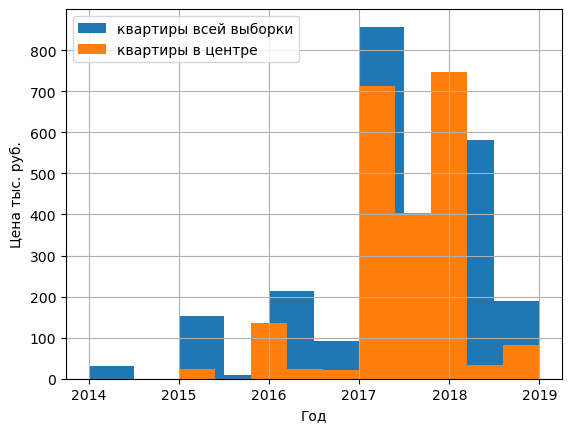

In [55]:
print('Гистаграмма зависимости цены от года')
ax = data_center_petersburg.pivot_table(index='last_price', values='day_year').plot(kind='hist', style='o-',grid=True)
good_data.pivot_table(index='last_price', values='day_year').plot(kind='hist', style='o-',ax=ax, grid=True)
ax.legend(["квартиры всей выборки", "квартиры в центре"])
plt.xlabel('Год')
plt.ylabel('Цена тыс. руб.')
plt.show()

Гистаграмма зависимости цены от площади


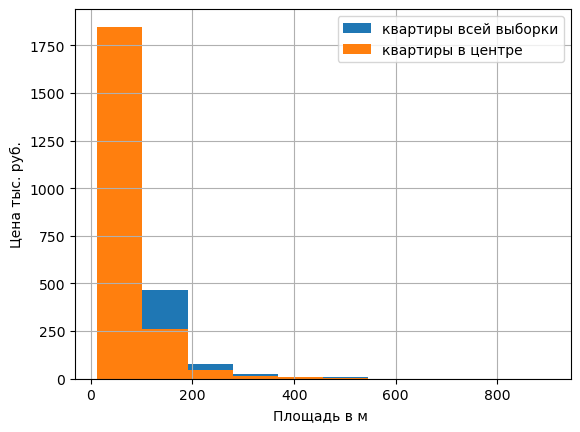

In [56]:
print('Гистаграмма зависимости цены от площади')
ax = data_center_petersburg.pivot_table(index='last_price', values='total_area').plot(kind='hist', style='o-',grid=True)
good_data.pivot_table(index='last_price', values='total_area').plot(kind='hist', style='o-',ax=ax, grid=True)
ax.legend(["квартиры всей выборки", "квартиры в центре"])
plt.xlabel('Площадь в м ')
plt.ylabel('Цена тыс. руб.')
plt.show()

Гистаграмма зависимости цены от кол-ва комнат


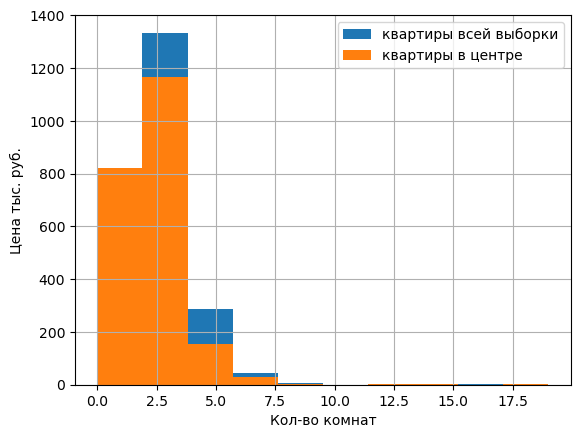

In [57]:
print('Гистаграмма зависимости цены от кол-ва комнат')
ax = data_center_petersburg.pivot_table(index='last_price', values='rooms').plot(kind='hist', style='o-',grid=True)
good_data.pivot_table(index='last_price', values='rooms').plot(kind='hist', style='o-',ax=ax, grid=True)
ax.legend(["квартиры всей выборки", "квартиры в центре"])
plt.xlabel('Кол-во комнат')
plt.ylabel('Цена тыс. руб.')
plt.show()

# Вывод:
По результатам исследования квартир в Санкт-Петербурге и соседних населённых пунктах можно сказать, что больше всего предложений имеется по квартирам с площадью 30-60 м^2, стоимостью около 4 млн. рублей, имеющие 1 или 2 комнаты, с высотой потолков 2,6 м.

По результатам исследования квартир в центре можно сказать, что больше всего предложений имеется по квартирам с площадью 64 м^2, стоимостью около 8 млн. рублей, имеющие 2 комнаты, с высотой потолков 2,7 м.

Удалось выявить некоторые закономерности:

В основном продажи осуществляются в 45 или 60 дней, тоесть на покупку квартиры после подачи объявления необходимо около 2х месяцев. Таким образом, можно считать, что продажи прошли быстро, если они длились 2-3 месяца, в остальных случаях продажи длились долго.

Меньше всего стоимость квартиры на первом и последнем этаже дома. Больше всего предложений можно найти по квартирам, которые расположенны на других этажах (кроме первого и последнего)

Между стоимостью квартиры и ее площадью наблюдается прямая зависимость, тоесть чем дороже квартира, тем она больше по площади. Такая же зависимоть наблюдается между стоимомтью и колличеством комнат, но она менее выражена. Между стоимостью квартиры и удаленности от центра обратно пропорциональная зависимость(чем дороже квартира, тем расстояние до центра меньше), но такая зависимость выраженна очень слабо.

Самая высокая стоимость квартир в Санкт-Петербурге и соседних населённых пунктах наблюдается в 2014 году, затем она начинает падать с 2015 - 2018 год.

В 2017 году сильно увеличивается спрос на квартиры за городом.